MovieWriter ffmpeg unavailable; using Pillow instead.


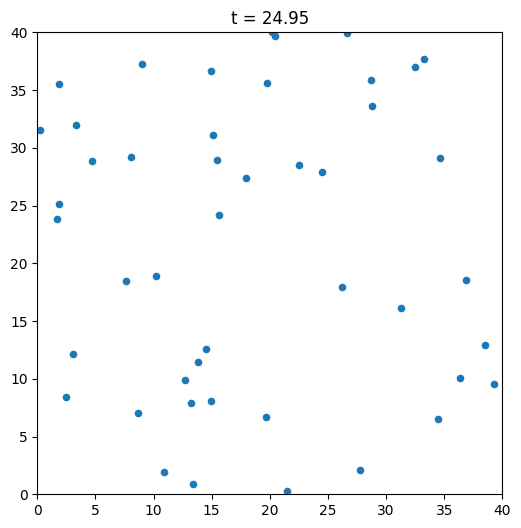

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

df = pd.read_csv("output.dat", encoding="utf-16", sep=",")

times = df['t']
n_frames = len(df)

N_particles = (df.shape[1] - 2) // 3

x_columns = [2 + 3*i + 1 for i in range(N_particles)]
y_columns = [2 + 3*i + 2 for i in range(N_particles)]

fig, ax = plt.subplots(figsize=(6, 6))
scat = ax.scatter([], [], s=20)
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)

def update(frame):
    x = df.iloc[frame, x_columns].values
    y = df.iloc[frame, y_columns].values
    scat.set_offsets(np.c_[x, y])
    ax.set_title(f"t = {times[frame]:.2f}")
    return scat,

anim = FuncAnimation(fig, update, frames=n_frames, interval=40, blit=False)

anim.save("teilchensimulation.gif", fps=50)
plt.show()
